## Predicting Chronic Kidney Disease in Patients
> Author: Matt Brems

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

In this lab, we're going to focus on steps exploring data, building models and evaluating the models we build.

There are three links you may find important:
- [A set of chronic kidney disease (CKD) data and other biological factors](./chronic_kidney_disease_full.csv).
- [The CKD data dictionary](./chronic_kidney_disease_header.txt).
- [An article comparing the use of k-nearest neighbors and support vector machines on predicting CKD](./chronic_kidney_disease.pdf).

## Step 1: Define the problem.

Suppose you're working for Mayo Clinic, widely recognized to be the top hospital in the United States. In your work, you've overheard nurses and doctors discuss test results, then arrive at a conclusion as to whether or not someone has developed a particular disease or condition. For example, you might overhear something like:

> **Nurse**: Male 57 year-old patient presents with severe chest pain. FDP _(short for fibrin degradation product)_ was elevated at 13. We did an echo _(echocardiogram)_ and it was inconclusive.

> **Doctor**: What was his interarm BP? _(blood pressure)_

> **Nurse**: Systolic was 140 on the right; 110 on the left.

> **Doctor**: It's an aortic dissection! Get to the OR _(operating room)_ now!

> _(intense music playing)_

In this fictitious scenario, you might imagine the doctor going through a series of steps like a [flowchart](https://en.wikipedia.org/wiki/Flowchart), or a series of if-this-then-that steps to diagnose a patient. The first steps made the doctor ask what the interarm blood pressure was. Because interarm blood pressure took on the values it took on, the doctor diagnosed the patient with an aortic dissection.

Your goal, as a research biostatistical data scientist at the nation's top hospital, is to develop a medical test that can improve upon our current diagnosis system for [chronic kidney disease (CKD)](https://www.mayoclinic.org/diseases-conditions/chronic-kidney-disease/symptoms-causes/syc-20354521).

**Real-world problem**: Develop a medical diagnosis test that is better than our current diagnosis system for CKD.

**Data science problem**: Develop a medical diagnosis test that reduces both the number of false positives and the number of false negatives.

---

## Step 2: Obtain the data.

### 1. Read in the data.

In [96]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler


# Import metrics individually this time
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,\
accuracy_score, roc_curve,  RocCurveDisplay, roc_auc_score, recall_score, \
precision_score, f1_score, classification_report

In [97]:
df = pd.read_csv('./chronic_kidney_disease_full.csv')

In [98]:
df.shape

(400, 25)

In [99]:
df.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

In [100]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

### 2. Check out the data dictionary. What are a few features or relationships you might be interested in checking out?

In [102]:
# Answer here:

# According to the data science problem and the steps that doctors asked the features should be age, bp , su ,htn 
# dm,cad. In addtional , sod and pot is impact the kidney 

# All features are impacted to Chronic Kidney Disease 

---

## Step 3: Explore the data.

### 3. How much of the data is missing from each column?

In [104]:
# Answer here:
df.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [105]:
df.shape

(400, 25)

In [106]:
#df.dropna(inplace=True)

In [107]:
#df.shape

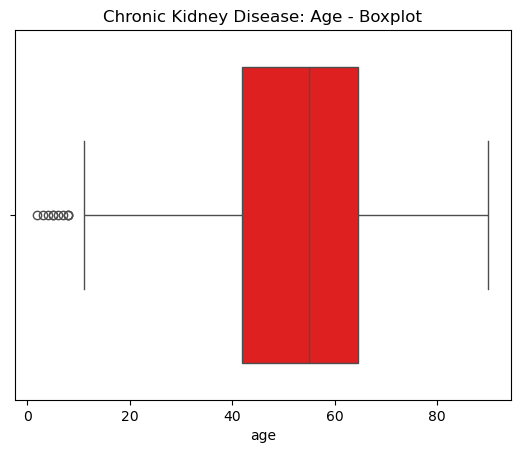

In [108]:
#outlier to explore the data that might be inaccurate or imprecise using boxplot 
#analyst on the features that I selected
plt.title('Chronic Kidney Disease: Age - Boxplot')
sns.boxplot(x=df['age'],color ='r');


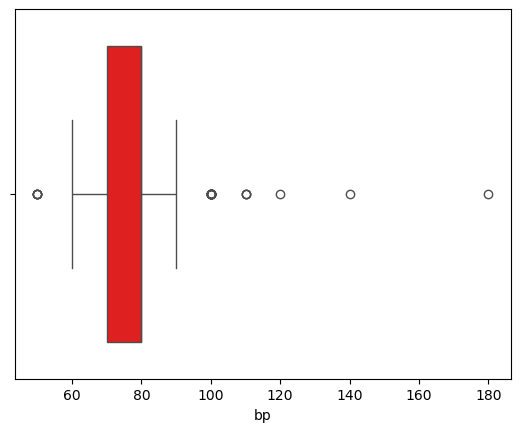

In [109]:
sns.boxplot(x=df['bp'],color ='r');

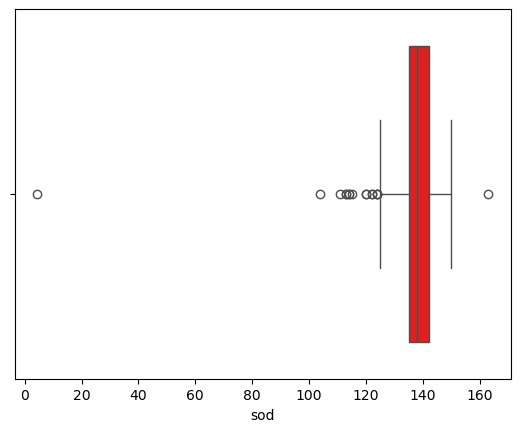

In [110]:
sns.boxplot(x=df['sod'],color ='r');

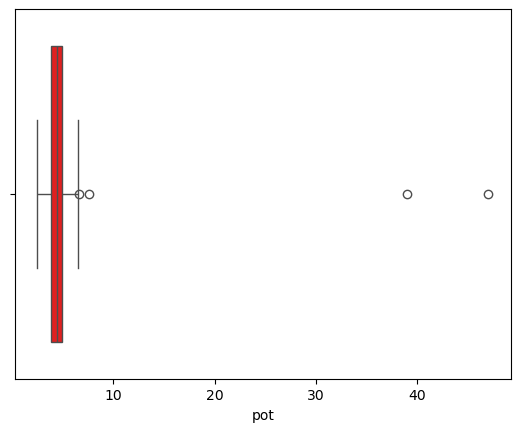

In [111]:
sns.boxplot(x=df['pot'],color ='r');

### 4. Suppose that I dropped every row that contained at least one missing value. (In the context of analysis with missing data, we call this a "complete case analysis," because we keep only the complete cases!) How many rows would remain in our dataframe? What are at least two downsides to doing this?

In [113]:
# Answer here:
# According to the shape result, df will have only 158 records from 400. 
# It create the most impact because it remove ~65% of records that would not necessory to drop every 0 in all columns
# Downsides from this decision mostly impact on our data sizing 
# - We drop the important information (such as we drop the row from the columns that would not impact the Chronic Kidney Disease)
# - Create bias on the data (Selection / Sampling Bias) that lead to our prediction will not effective on the result

### 5. Thinking critically about how our data were gathered, it's likely that these records were gathered by doctors and nurses. Brainstorm three potential areas (in addition to the missing data we've already discussed) where this data might be inaccurate or imprecise.

In [115]:
# Answer here:
#AL = albumin is not a direct effect of the chronic kidney disease (CKD) 

#because some experts think that a low serum albumin is just a marker (type of sign in the blood)
#that shows the kidneys have been harmed. 
#In other words, a low serum albumin only happens as a result of other underlying problems.
    
# extrasource from kidney.org
# https://www.kidney.org/kidney-failure-risk-factor-serum-albumin#:~:text=Many%20studies%20have%20shown%20that,of%20why%20there's%20a%20link

#BP = blood pressure. A nurse has a duty to check the blood pressure, 
#and it has many factors on the BP, such as machine, estimate #roundup, rounddown, and patient situation, 
#such as resting before measurement (it can reduce BP).

#SG is the density of urine compared to pure water in the same ratio. 
#This value will change according to the amount of water you 3drink. 
#If you drink a lot of water, the value will be low. If you drink less water or are dehydrated, the value will be higher. 

---

## Step 4: Model the data.

### 6. Suppose that I want to construct a model where no person who has chronic kidney disease (CKD) will ever be told that they do not have C. What (very simple, no machine learning needed) model can I create that will never tell a person with CKD that they do not have CKD?

> Hint: Don't think about `statsmodels` or `scikit-learn` here.

In [117]:
# Answer here:

# Using the Binary Classification is a model that has only 2 labels or classes: Class 0 (not CKD) and Class 1 (CKD). 
# The result of the prediction of the model will tell you did you are in class 0 or class 1. 
# however if we want to tell a person with CKD that they do not have CKD. It means the result is FP and tell them they don't have the
# CKD


### 7. In problem 6, what common classification metric did we optimize for? Did we minimize false positives or negatives?

In [119]:
# Answer here:

# According to classification evaluation metrics, I would like to optimize the recall 

# We optimized for a increase of FP and decrease FN to be 



### 8. Thinking ethically, what is at least one disadvantage to the model you described in problem 6?

In [121]:
# Answer here:
# This is unethical because patients with chronic kidney disease must receive care. 
# This criterion can lead to incorrect treatment and cause of death.

### 9. Suppose that I want to construct a model where a person who does not have CKD will ever be told that they do have CKD. What (very simple, no machine learning needed) model can I create that will accomplish this?

In [123]:
# Answer here:
# Using the Binary Classification is a model that has only 2 labels or classes: Class 0 (not CKD) and Class 1 (CKD). 
# The result of the prediction of the model will tell you did you are in class 0 or class 1. 
# however if we want to tell a person who don't have CKD that they have CKD. It means the result is FN and tell them they have the
# CKD

### 10. In problem 9, what common classification metric did we optimize for? Did we minimize false positives or negatives?

In [125]:
# Answer here:

# According to classification evaluation metrics, I would like to optimize the specificity 
# We optimized for a increase of FN and decrease FP

### 11. Thinking ethically, what is at least one disadvantage to the model you described in problem 9?

In [127]:
# Answer here:
# This is unethical because patients without chronic kidney disease must panic. 
# This criterion can lead to incorrect treatment and harm the quality of life

### 12. Construct a logistic regression model in `sklearn` predicting class from the other variables. You may scale, select/drop, and engineer features as you wish - build a good model! Make sure, however, that you include at least one categorical/dummy feature and at least one quantitative feature.

> Hint: Remember to do a train/test split!

In [129]:
df['class'] = df['class'].map({'ckd': 1, 'notckd': 0})
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,1


In [130]:
#Create dummies variable to check the correlation between values
df = pd.get_dummies(df)

In [131]:
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wbcc              float64
rbcc              float64
class               int64
rbc_abnormal         bool
rbc_normal           bool
pc_abnormal          bool
pc_normal            bool
pcc_notpresent       bool
pcc_present          bool
ba_notpresent        bool
ba_present           bool
htn_no               bool
htn_yes              bool
dm_no                bool
dm_yes               bool
cad_no               bool
cad_yes              bool
appet_good           bool
appet_poor           bool
pe_no                bool
pe_yes               bool
ane_no               bool
ane_yes              bool
dtype: object

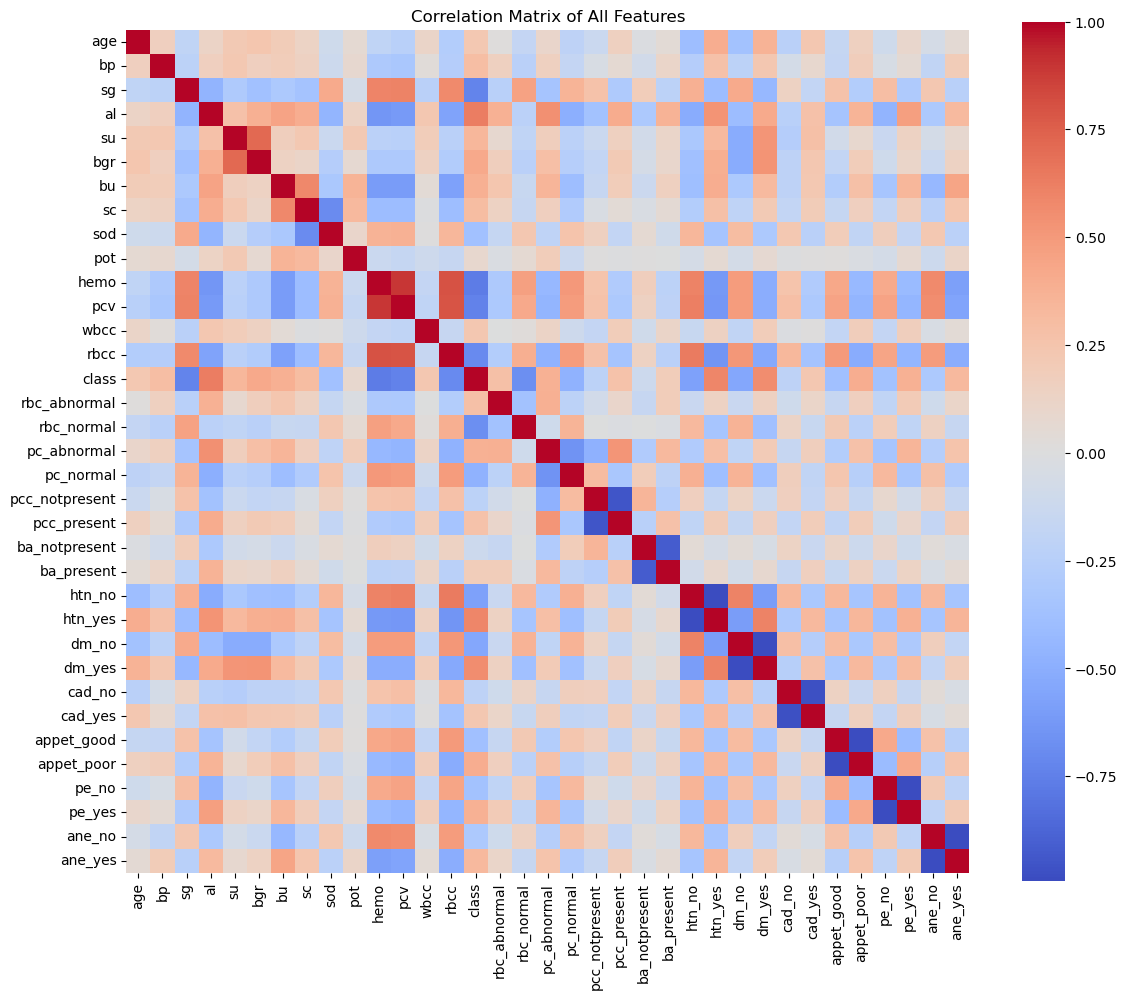

In [132]:
plt.figure(figsize=(12, 10))

corr_matrix = df.corr()

# Create a heatmap of the entire correlation matrix
sns.heatmap(corr_matrix, fmt='.2f', cmap='coolwarm', square=True)

plt.title('Correlation Matrix of All Features')
plt.tight_layout()
plt.show()

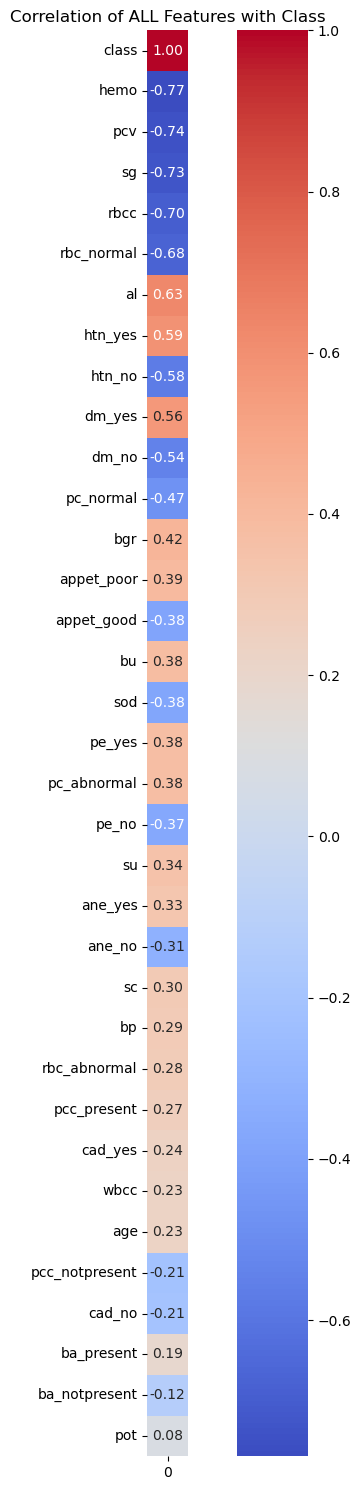

In [133]:

plt.figure(figsize=(10, 15)) 

# Calculate the correlation of 'class' with other variables and sort by absolute values
sorted_corr = df.corr()['class'].sort_values(key=lambda x: x.abs(), ascending=False)

# Create a heatmap 
sns.heatmap(sorted_corr.values.reshape(-1, 1), annot=True, fmt='.2f', cmap='coolwarm', square=True, yticklabels=sorted_corr.index)

plt.title('Correlation of ALL Features with Class')
plt.tight_layout()
plt.show()

In [134]:
print(sorted_corr)

class             1.000000
hemo             -0.768919
pcv              -0.741427
sg               -0.732163
rbcc             -0.699089
rbc_normal       -0.677781
al                0.627090
htn_yes           0.590438
htn_no           -0.575442
dm_yes            0.559060
dm_no            -0.543590
pc_normal        -0.474244
bgr               0.419672
appet_poor        0.393341
appet_good       -0.383621
bu                0.380605
sod              -0.375674
pe_yes            0.375154
pc_abnormal       0.375154
pe_no            -0.365101
su                0.344070
ane_yes           0.325396
ane_no           -0.314216
sc                0.299969
bp                0.294077
rbc_abnormal      0.282642
pcc_present       0.265313
cad_yes           0.236088
wbcc              0.231919
age               0.227268
pcc_notpresent   -0.214476
cad_no           -0.207511
ba_present        0.186871
ba_notpresent    -0.120445
pot               0.084541
Name: class, dtype: float64


In [135]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Filter to show only columns with missing values, and sort them in descending order
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

# Display the result
print(missing_percentage)

rbcc    32.75
wbcc    26.50
pot     22.00
sod     21.75
pcv     17.75
hemo    13.00
su      12.25
sg      11.75
al      11.50
bgr     11.00
bu       4.75
sc       4.25
bp       3.00
age      2.25
dtype: float64


In [136]:
#  rbcc ,pcv , hemo , su , sg , al   

#All features require to be imputed because it has a high correlation, but the missing percentage is high too.

columns_to_impute = ['rbcc', 'pcv', 'hemo', 'su', 'sg', 'al']

# Impute missing values with the mean of each column
for column in columns_to_impute:
    df[column] = df[column].fillna(df[column].mean())

In [137]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wbcc', 'rbcc', 'class', 'rbc_abnormal', 'rbc_normal',
       'pc_abnormal', 'pc_normal', 'pcc_notpresent', 'pcc_present',
       'ba_notpresent', 'ba_present', 'htn_no', 'htn_yes', 'dm_no', 'dm_yes',
       'cad_no', 'cad_yes', 'appet_good', 'appet_poor', 'pe_no', 'pe_yes',
       'ane_no', 'ane_yes'],
      dtype='object')

In [138]:
#Drop columns that high missing percentage and normal dummies columns
df = df.drop(columns=['wbcc', 'pot', 'sod','bgr',
                    'dm_no',
                    'cad_no',
                    'appet_poor',
                    'pe_no',
                    'ane_no',
                    'rbc_normal',
                    'pc_normal',
                    'pcc_notpresent',
                    'ba_notpresent',
                    'htn_no'])

In [139]:
df.dropna(inplace=True)

In [140]:
df.shape

(361, 21)

In [141]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bu', 'sc', 'hemo', 'pcv', 'rbcc',
       'class', 'rbc_abnormal', 'pc_abnormal', 'pcc_present', 'ba_present',
       'htn_yes', 'dm_yes', 'cad_yes', 'appet_good', 'pe_yes', 'ane_yes'],
      dtype='object')

In [142]:
df['class'].value_counts()

class
1    220
0    141
Name: count, dtype: int64

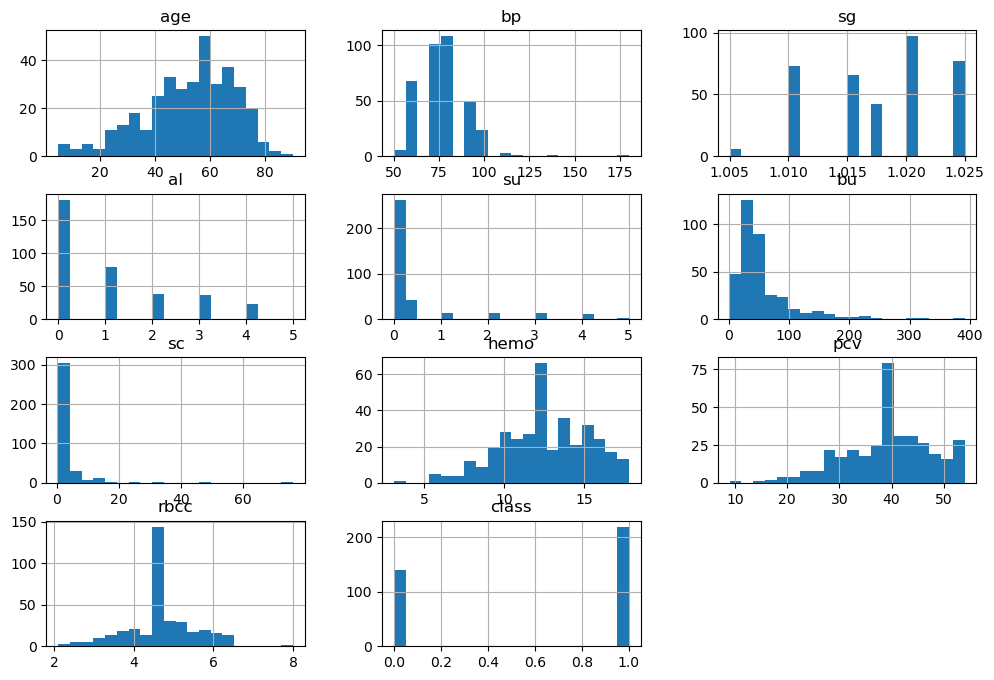

In [143]:
df.hist(bins=20, figsize=(12, 8))
plt.show()

In [144]:
X = df

In [145]:
X = X.drop(columns=['class'])

In [146]:
y = df['class']

In [147]:
# PAUSE -- WHAT IS OUR BASELINE?
round(y.value_counts(normalize=True)*100, 2)

# 0: CKD
# 1: Not have CKD

# Our majority class is '1' at 60%
# In classification, if the algorithm just predicted the majority class value 
# for every example, what would be the accuracy of the model?
# Thus, baseline is ~60%

class
1    60.94
0    39.06
Name: proportion, dtype: float64

In [148]:
# X before y, train before test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [149]:
# Check to see the frequencies of 1 and 0 in each of the y_train and y_test.
# Basically, to see if the we need to, or want to, stratify.
y_train.value_counts(normalize=True)*100

class
1    61.111111
0    38.888889
Name: proportion, dtype: float64

In [150]:
y_test.value_counts(normalize=True)*100

class
1    60.43956
0    39.56044
Name: proportion, dtype: float64

In [151]:
from sklearn.linear_model import LogisticRegression, LinearRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train);

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [152]:
logreg.score(X_train, y_train)

0.9851851851851852

In [153]:
logreg.score(X_test, y_test)

0.978021978021978

In [154]:
# Generate predictions
y_preds = logreg.predict(X_test)

In [155]:
accuracy_score(y_test, y_preds)

0.978021978021978

In [156]:
# Using a method from sklearn
f1_score(y_test, y_preds)

0.9814814814814815

In [157]:
cm = confusion_matrix(y_test, y_preds)

In [158]:
logreg.classes_

array([0, 1])

In [197]:
cm

array([[36,  0],
       [ 2, 53]])

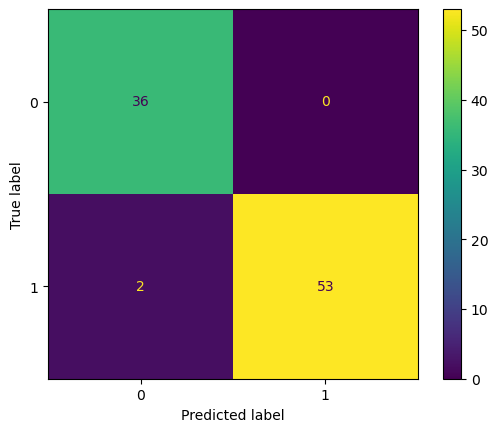

In [159]:
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_).plot();

In [160]:
# Build a text report showing the main classification metrics
print(classification_report(y_test, y_preds))
# F1 Score is part of the classification report

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        36
           1       1.00      0.96      0.98        55

    accuracy                           0.98        91
   macro avg       0.97      0.98      0.98        91
weighted avg       0.98      0.98      0.98        91



---

## Step 5: Evaluate the model.

### 13. Based on your logistic regression model constructed in problem 12, interpret the coefficient of one of your quantitative features.

In [162]:
feature_names = X_train.columns

coefficients = logreg.coef_[0]

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

print(coef_df)

         Feature  Coefficient
0            age     0.013161
1             bp     0.105377
2             sg     0.645477
3             al     1.661553
4             su     1.019468
5             bu     0.003549
6             sc     1.803388
7           hemo    -0.487115
8            pcv    -0.140543
9           rbcc    -0.292602
10  rbc_abnormal     0.285492
11   pc_abnormal     0.967884
12   pcc_present     0.104866
13    ba_present     0.007764
14       htn_yes     0.916268
15        dm_yes     1.481641
16       cad_yes     0.079301
17    appet_good    -0.002017
18        pe_yes     1.195854
19       ane_yes     0.435949


In [164]:
#Positive Coefficient example sc with a coefficient of 1.803, 
#it means that an increase sc as likely to have CKD
#Negative Coefficient example hemo with a coefficient of -0.487115, 
#it means that an decrease hemo as likely to have CKD

### 14. Based on your logistic regression model constructed in problem 12, interpret the coefficient of one of your categorical/dummy features.

In [ ]:
#categorical feature htn_yes that having a positive coefficient that increases as likely to have CKD


### 15. Despite being a relatively simple model, logistic regression is very widely used in the real world. Why do you think that's the case? Name at least two advantages to using logistic regression as a modeling technique.

Answer:

The coefficients in a logistic regression model are interpretable.
Logistic regression is a very fast model to fit and generate predictions from.


### 16. Does it make sense to generate a confusion matrix on our training data or our test data? Why?

> Hint: Once you've generated your predicted $y$ values and you have your observed $y$ values, then it will be easy to [generate a confusion matrix using sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

In [ ]:
#It makes sense to generate a confusion matrix on the test data 
#because it provides visualize how our model performs.

### 17. In this hospital case, we want to predict CKD. Do we want to optimize for sensitivity, specificity, or something else? Why? (If you don't think there's one clear answer, that's okay! There rarely is. Be sure to defend your conclusion!)

In [ ]:
#Answer:
#Misclassification Rate because it told the percentage of observations that model predicted incorrectly. 
#Optimize Sensitivity because it impacts the patient's life and is at high risk if the patient does not have the suitable clinical process.
# If we can increase the true positive, it means we can save people lives.

### 18 (BONUS). Write a function that will create an ROC curve for you, then plot the ROC curve.

Here's a strategy you might consider:
1. In order to even begin, you'll need some fit model. Use your logistic regression model from problem 12.
2. We want to look at all values of your "threshold" - that is, anything where .predict() gives you above your threshold falls in the "positive class," and anything that is below your threshold falls in the "negative class." Start the threshold at 0.
3. At this value of your threshold, calculate the sensitivity and specificity. Store these values.
4. Increment your threshold by some "step." Maybe set your step to be 0.01, or even smaller.
5. At this value of your threshold, calculate the sensitivity and specificity. Store these values.
6. Repeat steps 3 and 4 until you get to the threshold of 1.
7. Plot the values of sensitivity and 1 - specificity.

In [166]:
# Scale Features
sc = StandardScaler() # transformer

# Fit/transform
X_train_sc = sc.fit_transform(X_train)

# Transform
X_test_sc = sc.transform(X_test)
logregsc = LogisticRegression()
logregsc.fit(X_train_sc, y_train)

LogisticRegression()

In [170]:
#y_preds_sc = logregsc.predict(X_test_sc)

In [172]:
pred_df = pd.DataFrame({'true_values': y_test, 
                        'pred_probs': logregsc.predict_proba(X_test_sc)[:,1]})

pred_df.head()

,true_values,pred_probs
183,1,0.938204
36,1,0.995573
16,1,0.918569
360,0,0.002367
62,1,0.999176


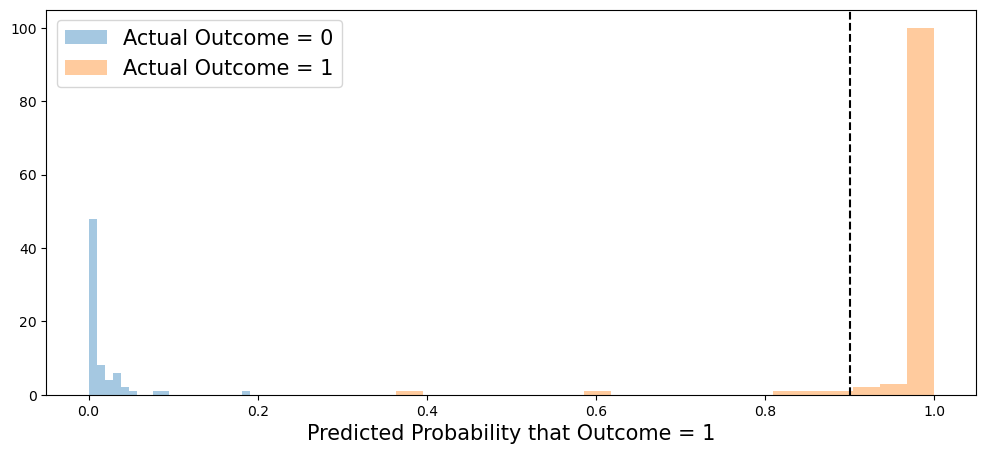

In [184]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

# Distplot with threshold
plt.figure(figsize = (12, 5))

# plot distributions of predicted probabilities by actual values
for group in pred_df.groupby('true_values'):
    sns.distplot(group[1], kde = False, bins = 20, label = f'Actual Outcome = {group[0]}')

# Add cutoff line
plt.axvline(0.9, color = 'black', linestyle = '--')



plt.xlabel('Predicted Probability that Outcome = 1', fontsize = 15)
plt.legend(fontsize = 15);

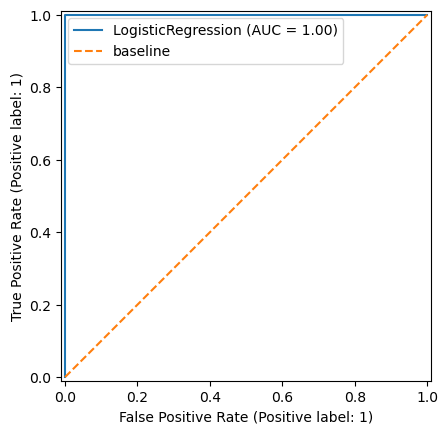

In [186]:
RocCurveDisplay.from_estimator(logregsc, X_test_sc, y_test)
plt.plot([0,1], [0,1], label='baseline', linestyle = '--')
plt.legend(); 

In [188]:
roc_auc_score(y_test, logreg.predict_proba(X_test_sc)[:, 1])

0.9722222222222222

### 19. Suppose you're speaking with the biostatistics lead at Mayo Clinic, who asks you "Why are unbalanced classes generally a problem? Are they a problem in this particular CKD analysis?" How would you respond?

In [193]:
# Answer:
# Class imbalance is a common problem in machine learning that occurs when the distribution of values 
# within a dataset is skewed or biased. 
# This can lead to a bias in the trained model, which can negatively impact its performance 
# In our CKD analysis, if the dataset is unbalanced 
# with a smaller number of CKD-positive cases, this imbalance could lead our model’s sensitivity.

### 20. Suppose you're speaking with a doctor at Mayo Clinic who, despite being very smart, doesn't know much about data science or statistics. How would you explain why unbalanced classes are generally a problem to this doctor?

In [191]:
#Answer: Unbalanced classes is lead to incorrect prediction

#For example, it could predict that a patient has CKD when they don’t, which might cause unnecessary worry. 
#Or, it might miss a patient who actually has CKD, meaning they wouldn’t get the treatment they need. 


### 21. Let's create very unbalanced classes just for the sake of this example! Generate very unbalanced classes by [bootstrapping](http://stattrek.com/statistics/dictionary.aspx?definition=sampling_with_replacement) (a.k.a. random sampling with replacement) the majority class.

1. The majority class are those individuals with CKD.
2. Generate a random sample of size 200,000 of individuals who have CKD **with replacement**. (Consider setting a random seed for this part!)
3. Create a new dataframe with the original data plus this random sample of data.
4. Now we should have a dataset with around 200,000 observations, of which only about 0.00075% are non-CKD individuals.

In [229]:
#define major and minor class for bootstrapping
major_class = df[df['class'] == 1]  # Individuals with CKD
minor_class = df[df['class'] == 0]  

#Generate a random sample of size 200,000 of individuals who have CKD **with replacement**.
boots_major = np.random.choice(major_class.index, size=200000, replace=True)

# Create a new dataframe with the original data plus this random sample of data.
boots_df = major_class.loc[boots_major]
n_df = pd.concat([df, boots_df], ignore_index=True)
print(n_df['class'].value_counts())

class
1    200220
0       141
Name: count, dtype: int64


### 22. Build a logistic regression model on the unbalanced class data and evaluate its performance using whatever method(s) you see fit. How would you describe the impact of unbalanced classes on logistic regression as a classifier?
> Be sure to look at how well it performs on non-CKD data.

In [235]:
X_unbalanced = n_df.drop(columns=['class'])
y_unbalanced = n_df['class']

In [243]:
X_ub_train, X_ub_test, y_ub_train, y_ub_test = train_test_split(X_unbalanced, y_unbalanced, random_state=42)

In [245]:
ub_lr = LogisticRegression()
ub_lr.fit(X_ub_train, y_ub_train)

LogisticRegression()

In [247]:
y_un_pred=ub_lr.predict(X_ub_test)

In [249]:
ub_lr.score(X_ub_train, y_ub_train)

0.9996473015239236

In [251]:
ub_lr.score(X_ub_test, y_ub_test)

0.9995807630113194

In [253]:
print("Classification Report:", classification_report(y_ub_test, y_un_pred))

Classification Report:               precision    recall  f1-score   support

           0       1.00      0.51      0.68        43
           1       1.00      1.00      1.00     50048

    accuracy                           1.00     50091
   macro avg       1.00      0.76      0.84     50091
weighted avg       1.00      1.00      1.00     50091



In [ ]:
#Suppose model predict the incidence of CKD 
  #  99.9% of my observations are "have CKD."
  #  0.1% of my observations contain "non-CKD"

---

## Step 6: Answer the problem.

At this step, you would generally answer the problem! In this situation, you would likely present your model to doctors or administrators at the hospital and show how your model results in reduced false positives/false negatives. Next steps would be to find a way to roll this model and its conclusions out across the hospital so that the outcomes of patients with CKD (and without CKD!) can be improved!

In [ ]:
# The presentation will implement the problem statement to 
# Develop a medical diagnosis test that reduces both the number of false positives and the number of false negatives.
# by Improving Outcomes: to use this model to improve outcomes for both CKD and non-CKD patients
# CKD patients: Ensure that no CKD cases are missed and patients receive timely interventions.
# Non-CKD patients: Ensure that no healthy patients are incorrectly diagnosed, 
# Next will get more information to reduce unbalanced data and get more variance. 